In [2]:
from functions import *

- **all_path**: path of final dataset created from 'load_data_unemployment'notebook, merged with financial crisis & H1N1 financial crisis dummy variables and data for the price of gold in USD

In [3]:
all_path = '<path to final dataset>'
df_all_countries = import_main_df(all_path)
df_all_countries.head()

,Time Series,AUD_USD,NZD_USD,GBP_USD,BRL_USD,CND_USD,CNY_USD,KRW_USD,MXN_USD,ZAR_USD,...,BRL_UE,CND_UE,KRW_UE,MXN_UE,DKK_UE,JPY_UE,NOK_UE,SEK_UE,USD_UE,h1n1
0,2000-01-03,1.5172,1.9033,0.6146,1.8050,1.4465,8.2798,1128.0,9.4015,6.126,...,0.137662,0.068,0.051,0.023,0.05,0.047,0.034,0.062,0.04,0
1,2000-01-04,1.5239,1.9238,0.6109,1.8405,1.4518,8.2799,1122.5,9.4570,6.085,...,0.137662,0.068,0.051,0.023,0.05,0.047,0.034,0.062,0.04,0
2,2000-01-05,1.5267,1.9339,0.6092,1.8560,1.4518,8.2798,1135.0,9.5350,6.070,...,0.137662,0.068,0.051,0.023,0.05,0.047,0.034,0.062,0.04,0
3,2000-01-06,1.5291,1.9436,0.6070,1.8400,1.4571,8.2797,1146.5,9.5670,6.080,...,0.137662,0.068,0.051,0.023,0.05,0.047,0.034,0.062,0.04,0
4,2000-01-07,1.5272,1.9380,0.6104,1.8310,1.4505,8.2794,1138.0,9.5200,6.057,...,0.137662,0.068,0.051,0.023,0.05,0.047,0.034,0.062,0.04,0


In [4]:
#replace country_code with any of the mentioned codes in the README 

country_code = 'AUD'

In [5]:
df_train, dates_list, var_list = other_country_vars(df_all_countries, country_code)

Shape of training dataset = (4997, 9)
Number of dates = 4997
Selected features: ['Time Series', 'AUD_USD', 'AUD_IR', 'AUD_GDP', 'AUD_trade', 'AUD_UE', 'fc_year', 'price_gold', 'h1n1']


In [6]:
df_matrixtrain, df_matrixtrain_scaled, scaler, scaler_y = matrix_and_scale(df_train, var_list)

Shape of training matrix = (4997, 8)
Shape of scaled training matrix = (4997, 8)


In [51]:
n_future = 365  #number of forecasted days
n_past = 3  #number of days used to predict future 
X_train, y_train = data_for_model(n_future, n_past, df_matrixtrain_scaled)

Shape of X_train = (4630, 3, 8)
Shape of y_train = (4630, 1)


In [52]:
#units, dropout 
model = make_model(n_past, df_matrixtrain_scaled, 50, 0.20)

In [ ]:
#epoch, batches
history, fitted_model = fit_training(model, X_train, y_train, 100, 16)

In [9]:
#refer to keras documentation for model extensions; the one used here was .h5

fitted_model.save('<path to save model>')

In [168]:
#to load the already trained model 
#fitted_model = load_model('<path to saved model>', compile=True)

In [54]:
future_datelist = get_future_dates(dates_list, n_future)
pred_future, pred_train = get_predictions(fitted_model, X_train, n_future, n_past)
y_pred_future, y_pred_train = inverse_predictions(pred_future, pred_train, scaler_y)



In [55]:
df_future_predictions, df_training_predictions = pred_to_dataframe(y_pred_future, country_code, future_datelist, 
                                                                    y_pred_train, dates_list, n_past, n_future)

In [56]:
# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
df_training_predictions.index = df_training_predictions.index.to_series().apply(datetime_to_timestamp)

print(df_training_predictions.tail(3))
print(df_future_predictions.head(3))

             AUD_USD
2019-12-26  1.447464
2019-12-27  1.447570
2019-12-30  1.447020
             AUD_USD
2019-12-30  1.381617
2019-12-31  1.382194
2020-01-01  1.381286


In [46]:
dataset_train = dataset_for_visual(df_train, var_list, dates_list)

- **path2020**: path to dataset that contains the actual 2020 exchange rate values for the countries

In [35]:
path2020 = '<path to dataset with exchange rates for 2020'
df_2020 = get_2020(path2020, df_future_predictions, country_code)

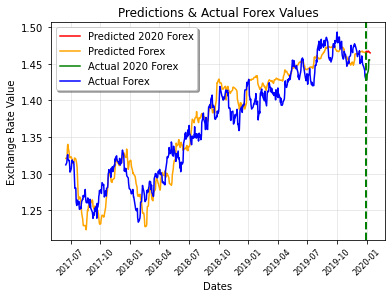

In [27]:
start_plotting_date = '2017-06-16'  #any date (so long as it is in the dataset can be used)
plotting(start_plotting_date, df_future_predictions, df_training_predictions, dataset_train, country_code, df_2020)
#when n_future = 14

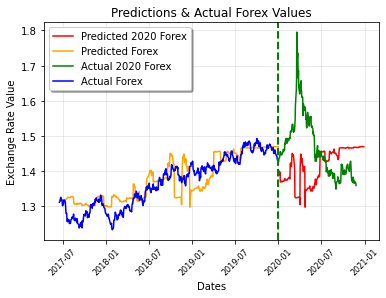

In [37]:
start_plotting_date = '2017-06-16'  #any date (so long as it is in the dataset can be used)
plotting(start_plotting_date, df_future_predictions, df_training_predictions, dataset_train, country_code, df_2020)
#when n_future = 365

In [39]:
output_notebook()
#to display bokeh graph to html comment out output_notebook()
bokeh_plotting(df_future_predictions, country_code, df_training_predictions, dataset_train, df_2020)
#when n_future = 365

Loading BokehJS ...

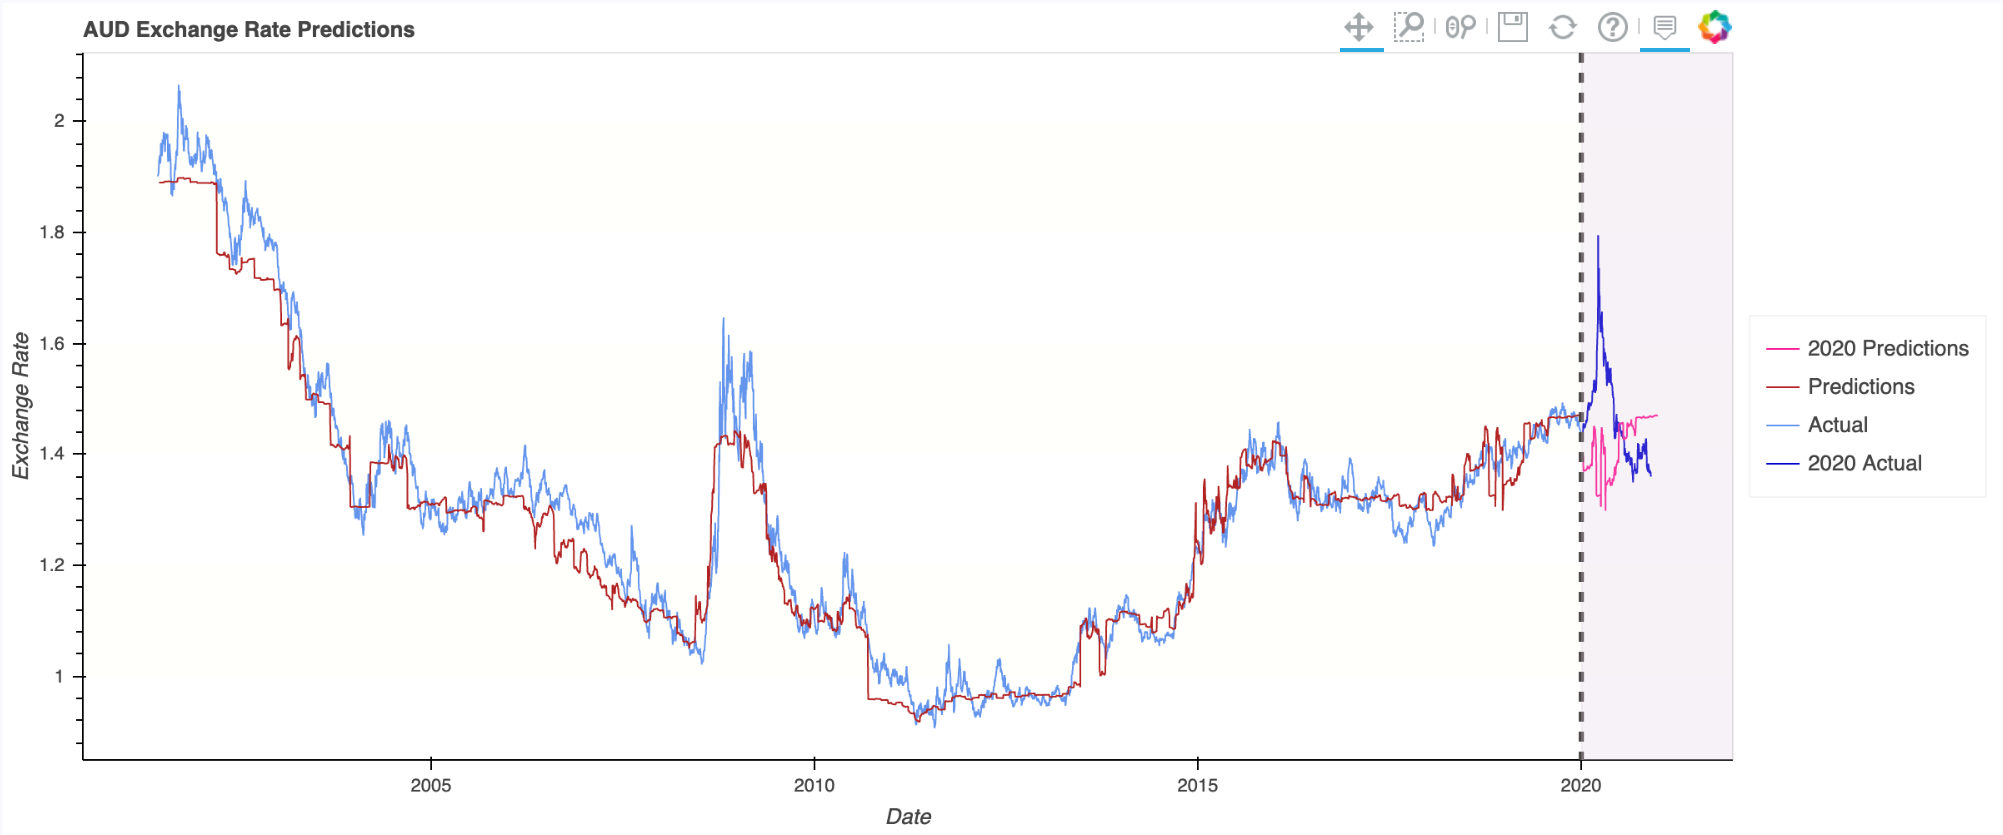

In [58]:
Image(filename='nfuture365.png')

In [20]:
eval_metrics(dataset_train, df_training_predictions, country_code)

RMSE: 0.025659575984588564
RMSE of Scaled Values: 0.12980926720150035
R2_Score: 0.9776207089311818
R2_Score of Scaled Values: 0.9831495541486095
